<center>
<span style="font-family:Comic Sans MS; color:navy"><h2>Titanic Binary classfication</h2></span>
</center>

#  <span style="font-family:Comic Sans MS; color:navy"><h5>1:About DataSet</h5></span>
- <span style='font-family:comic Sans MS; color:navy'> Project Summary: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.</span>

- <span style='font-family:comic Sans MS; color:navy'>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.</span>
<div>
    
</div>
<center>    
<img src="https://t2.gstatic.com/licensed-image?q=tbn:ANd9GcScs1kCii2vJENMwTk2oDcUTmdYuuuWIa60xfevnMjHPbCMjIlb5Ssl23u7DoW_BRgc", width="400",  height="300"/>
</center>

# <span style="font-family:Comic Sans MS; color:navy"><h5>2: Define the Problem</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy</span>
<div>

</div>
<center>    
<img src="https://www.titanicuniverse.com/wp-content/uploads/2022/08/how-many-people-survived-the-titanic-featured-930x620-1.jpg", width="400",  height="300"/>
</center>


# <span style="font-family:Comic Sans MS; color:navy"><h5>3:Import Libraries</h5></span>

In [20]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
#ignore warnings

import warnings
warnings.filterwarnings('ignore')

#for graphs, visuals, etc.
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# import cufflinks as cf
# cf.go_offline()

# for Modelling
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12,8


# <span style="font-family:Comic Sans MS; color:navy"><h5>4:Import Data</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>It's my first competation in Kaggle,Titanic DataSet have 3 part:
    <ul>
        <li>
            <h6>train.csv:</h6> Contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.
        </li>
        <li>
            <h6>test.csv:</h6>
            Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived
        </li>
        <li>
          <h6>gender_submission.csv:</h6>
            The gender_submission.csv file is provided as an example that shows how you should structure your predictions
        </li>
    </ul>
</span>

In [33]:
# import data
tod = pd.read_csv('./Data/train.csv')
tod_test = pd.read_csv('./Data/test.csv')
tod_gender = pd.read_csv('./Data/gender_submission.csv')

# <span style="font-family:Comic Sans MS; color:navy"><h5>5:PreProccessing</h5></span>
## <span style="font-family:Comic Sans MS; color:navy"><h5>5.1:How data look</h5></span>



In [34]:
#train data
tod.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# test data
tod_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
# gender_submission
tod_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## <span style="font-family:Comic Sans MS; color:navy"><h5>5.2:Data information</h5></span>

In [42]:
# Columns
tod.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
tod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
tod.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <span style="font-family:Comic Sans MS; color:navy"><h5>5.3:Data Cleaning</h5></span>
### <span style="font-family:Comic Sans MS; color:navy"><h5>5.3.1:Correcting</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>correcting aberrant values and outliers</span>
<div>

In [45]:
# cheack
tod.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


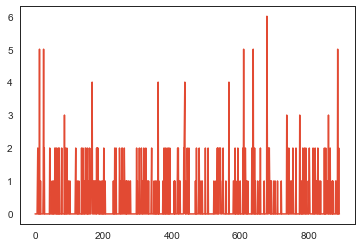

In [70]:
outliers_sibsp = tod['SibSp'].max()
tod['SibSp'][tod['SibSp'] == outliers_sibsp]
outliers_Parch = tod['Parch'].max()
tod['Parch'].plot()
# tod['Parch'][tod['Parch'] == outliers_sibsp]

In [72]:
outliers_fare = tod['Fare'].max()

In [50]:
tod['Fare'][tod['Fare']==outliers_fare]

258    512.3292
679    512.3292
737    512.3292
Name: Fare, dtype: float64

In [51]:
tod.drop([258,679,737],axis=0,inplace=True)

### <span style="font-family:Comic Sans MS; color:navy"><h5>5.3.2:Completing</h5></span>
- <span style='font-family:comic Sans MS; color:navy'>completing missing information</span>
<div>
